#Classificando as espécies da flor Iris utilizando Perceptron

##Etapa 01
Importar as bibliotecas de computação científica e aprendizado de máquina.

In [77]:
#Bibliotecas de aprendizado de máquina
from sklearn import datasets
from sklearn.model_selection import train_test_split

#Bibliotecas de computação científica
import numpy as np
import math
import matplotlib.pyplot as plt

##Etapa 02
Importar a base de dados Iris do sklearn e definir as classes.

In [78]:
iris_dataset = datasets.load_iris()
#print("Descrição da base de dados :: ", iris_dataset['DESCR'])

##Etapa 03
Conhecer a base de dados e plotar as características comprimento de sépala e pétala para setosa e versicolor.


Quantidade de labels:  (150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

Nome das classes:  ['setosa' 'versicolor' 'virginica']

Nome das características:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


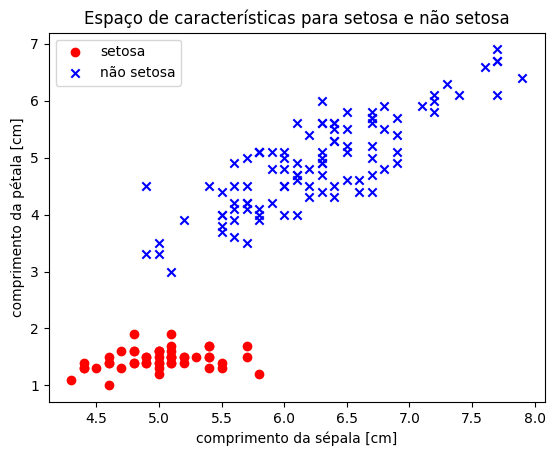

In [79]:
print('\nQuantidade de labels: ', iris_dataset.target.shape)
print(iris_dataset.target)

print('\nNome das classes: ', iris_dataset.target_names)

print('\nNome das características: ', iris_dataset.feature_names)

#Selecionar as características sepal length e petal length para setosa e versicolor
data_plot = iris_dataset.data[0:150,[0, 2]]

#Plotar os dados
plt.scatter(data_plot[:50, 0], data_plot[:50, 1],
            color='red', marker='o', label='setosa')

plt.scatter(data_plot[51:151, 0], data_plot[51:151, 1],
            color='blue', marker='x', label='não setosa')

plt.title('Espaço de características para setosa e não setosa')
plt.xlabel('comprimento da sépala [cm]')
plt.ylabel('comprimento da pétala [cm]')
plt.legend(loc='upper left')

plt.show()

##Etapa 04
Partição dos dados: 75% treinamento e 25% validação.

In [80]:
#Obter os dados
X = iris_dataset.data[:,2:4]
Y = iris_dataset.target


#Particionar os dados
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)

print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_test', x_test.shape)
print('y_test', y_test.shape)
print(y_test)
#Transformar as labels em -1 para setosa e 1 para versicolor
y_train = np.where(y_train == 0, -1, 1)
y_test = np.where(y_test == 0, -1, 1)
print(y_test)

x_train (120, 2)
y_train (120,)
x_test (30, 2)
y_test (30,)
[2 2 0 1 0 1 0 1 1 1 1 2 2 2 0 1 0 1 2 2 0 0 2 1 1 1 0 0 2 1]
[ 1  1 -1  1 -1  1 -1  1  1  1  1  1  1  1 -1  1 -1  1  1  1 -1 -1  1  1
  1  1 -1 -1  1  1]


##Etapa 05
Treinando o Perceptron

In [81]:
#Definição dos hiperparâmetros
learning_rate = 1
training_steps = 1000

#Criação de função lambda para ativação
activation = lambda x: -1 if x < 0 else 1

#Inicialização dos pesos
#W = [0, 0, 0, 0]
W = np.random.rand(x_train.shape[1])
print ('Vetor de peso inicial: ', W)

#Treinamento
for i in range(training_steps):
  for j in range(len(x_train)):
    x = x_train[j]
    y = y_train[j]
    l1 = np.dot(W, x)
    y_pred = activation(l1)
    error = y - y_pred
    update = learning_rate * error * x
    W += update

print('\nVetor de peso final: ', W)


Vetor de peso inicial:  [0.44855808 0.26382541]

Vetor de peso final:  [-11.55144192  76.06382541]


##Etapa 06
Validando o modelo.

In [82]:
print("\nValores encontrados após o treino:")

count_erro = 0
count_acerto = 0
for i in range(len(x_test)):
  y_pred = np.dot(x_test[i], W)

  if(activation(y_pred) == y_test[i]):
    print('Predito: ', activation(y_pred), ' - Real: ', y_test[i], 'OK')
    count_acerto = count_acerto+1
  else:
    print('Predito: ', activation(y_pred), ' - Real: ', y_test[i], 'ERRO')
    count_erro = count_erro+1

acuracia = 100*count_acerto/len(x_test)

print('Número de acertos:', count_acerto, '\nNúmero de erros:', count_erro)
print('Acurácia: %.2f' %acuracia )



Valores encontrados após o treino:
Predito:  1  - Real:  1 OK
Predito:  1  - Real:  1 OK
Predito:  1  - Real:  -1 ERRO
Predito:  1  - Real:  1 OK
Predito:  -1  - Real:  -1 OK
Predito:  1  - Real:  1 OK
Predito:  -1  - Real:  -1 OK
Predito:  1  - Real:  1 OK
Predito:  1  - Real:  1 OK
Predito:  1  - Real:  1 OK
Predito:  1  - Real:  1 OK
Predito:  1  - Real:  1 OK
Predito:  1  - Real:  1 OK
Predito:  1  - Real:  1 OK
Predito:  -1  - Real:  -1 OK
Predito:  1  - Real:  1 OK
Predito:  -1  - Real:  -1 OK
Predito:  1  - Real:  1 OK
Predito:  1  - Real:  1 OK
Predito:  1  - Real:  1 OK
Predito:  -1  - Real:  -1 OK
Predito:  -1  - Real:  -1 OK
Predito:  1  - Real:  1 OK
Predito:  1  - Real:  1 OK
Predito:  1  - Real:  1 OK
Predito:  1  - Real:  1 OK
Predito:  -1  - Real:  -1 OK
Predito:  1  - Real:  -1 ERRO
Predito:  1  - Real:  1 OK
Predito:  1  - Real:  1 OK
Número de acertos: 28 
Número de erros: 2
Acurácia: 93.33
